In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

In [17]:
df = pd.read_csv('csv/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [18]:
cols_to_drop = ["Address", "SellerG", "Date", "CouncilArea"]
df = df.drop(columns=cols_to_drop)

In [19]:
print(df.isnull().sum())

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [20]:
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [21]:
label_cols = ["Suburb", "Type", "Method", "Regionname"]
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,0,2,0,1480000.0,1,2.5,3067.0,2.0,1.0,1.0,202.0,126.0,1970.0,-37.7996,144.9984,2,4019.0
1,0,2,0,1035000.0,1,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,2,4019.0
2,0,3,0,1465000.0,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,2,4019.0
3,0,3,0,850000.0,0,2.5,3067.0,3.0,2.0,1.0,94.0,126.0,1970.0,-37.7969,144.9969,2,4019.0
4,0,4,0,1600000.0,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,2,4019.0


In [22]:
X = df[["Rooms", "Type", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "Lattitude", "Longtitude", "Regionname"]]
Y = df["Price"]

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

In [24]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [25]:
Y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 188956304434.28
R^2 Score: 0.53


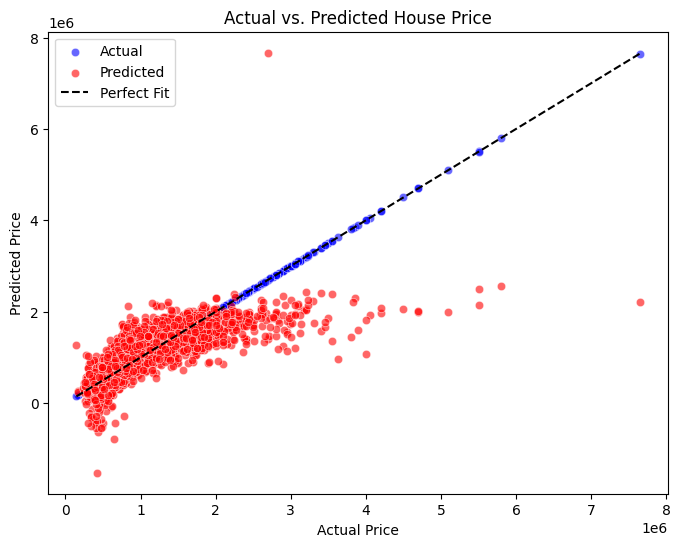

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual", alpha=0.6)
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted", alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="black", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Price")
plt.legend()
plt.show()

In [28]:
features = ["Rooms", "Type", "Distance", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "Lattitude", "Longtitude", "Regionname"]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['cluster'] = model.fit_predict(X_scaled)

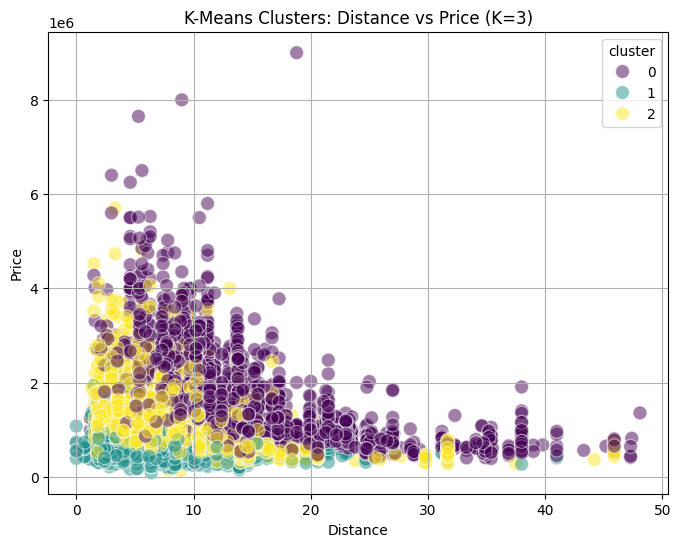

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Distance', y='Price', hue='cluster', palette='viridis', data=df, s=100, alpha=0.5)
plt.title('K-Means Clusters: Distance vs Price (K=3)')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.grid(True)
plt.show()